# Klasifikasi data pembelian komputer
---
Nama : Riza Anwar Fadil

NIM  : 1227050116

Praktikum Pembelajaran Mesin Kelas F

## Import Library

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Loading Data

In [20]:
data = pd.read_csv('dataset_buys _comp.csv')

In [21]:
data

,Age,Income,Student,Credit_Rating,Buys_Computer
0,Tua,Tinggi,Ya,Buruk,0
1,Paruh Baya,Tinggi,Ya,Baik,1
2,Paruh Baya,Rendah,Tidak,Buruk,1
3,Tua,Rendah,Tidak,Baik,1
4,Tua,Rendah,Ya,Baik,1
...,...,...,...,...,...
995,Muda,Tinggi,Tidak,Buruk,0
996,Paruh Baya,Rendah,Ya,Buruk,1
997,Paruh Baya,Tinggi,Tidak,Buruk,0
998,Muda,Tinggi,Ya,Buruk,1


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            1000 non-null   object
 1   Income         1000 non-null   object
 2   Student        1000 non-null   object
 3   Credit_Rating  1000 non-null   object
 4   Buys_Computer  1000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [23]:
data.describe(include='all')

,Age,Income,Student,Credit_Rating,Buys_Computer
count,1000,1000,1000,1000,1000.000000
unique,3,3,2,2,NaN
top,Paruh Baya,Tinggi,Ya,Buruk,NaN
freq,346,347,510,526,NaN
mean,NaN,NaN,NaN,NaN,0.669000
std,NaN,NaN,NaN,NaN,0.470809
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,1.000000


In [24]:
print(data.isnull().sum())

Age              0
Income           0
Student          0
Credit_Rating    0
Buys_Computer    0
dtype: int64


## EDA

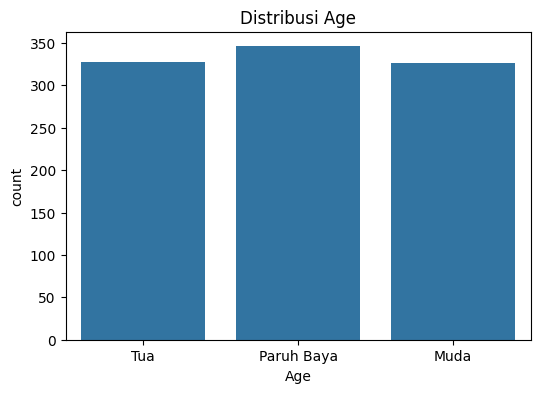

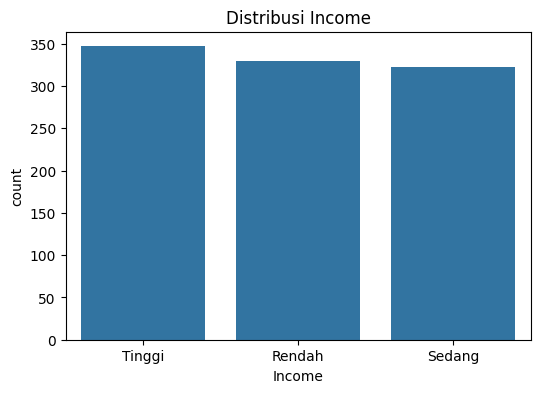

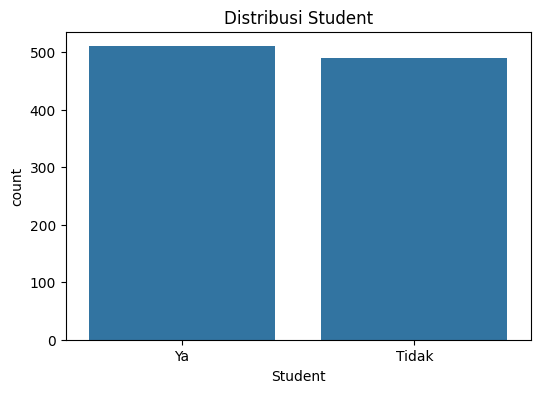

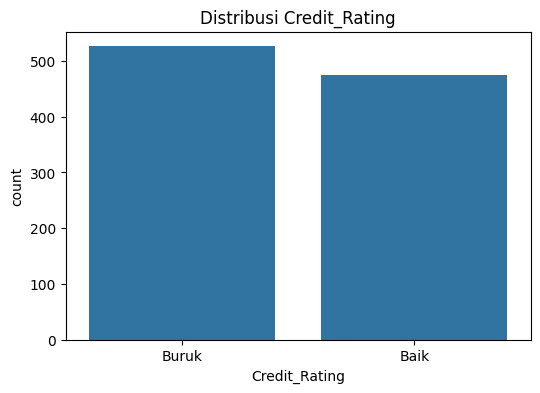

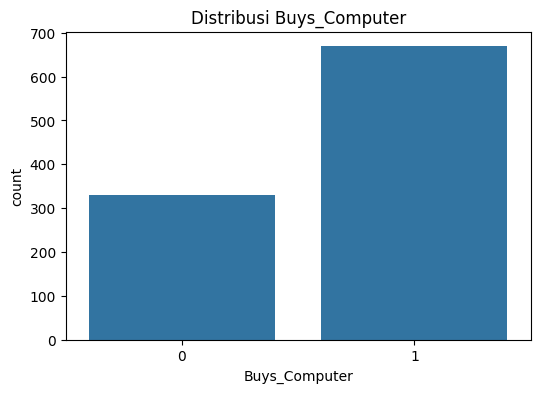

In [25]:
for col in data.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribusi {col}')
    plt.show()


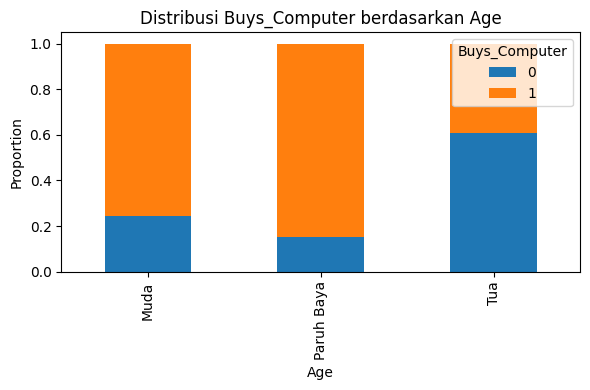

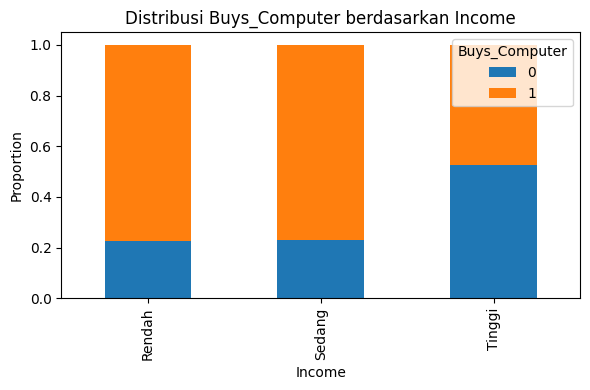

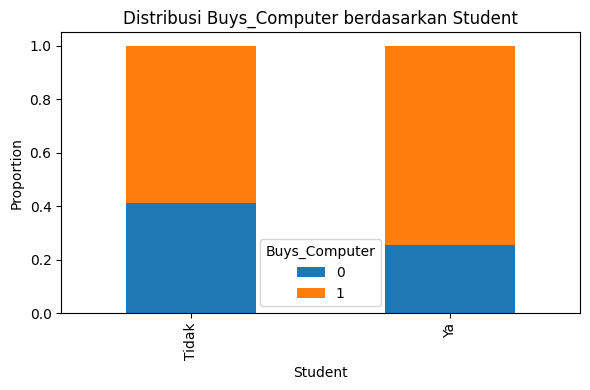

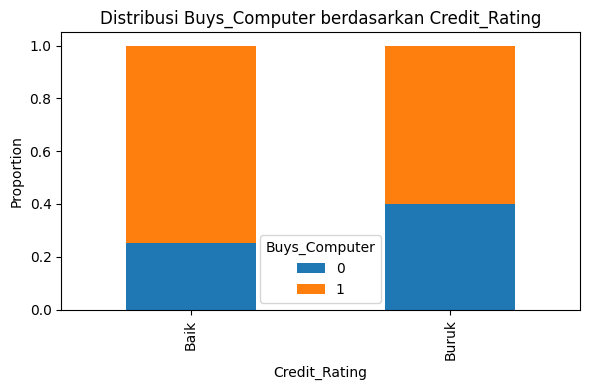

In [26]:
features = ['Age', 'Income', 'Student', 'Credit_Rating']

for feature in features:
    pd.crosstab(data[feature], data['Buys_Computer'], normalize='index') \
        .plot(kind='bar', stacked=True, figsize=(6, 4))

    plt.title(f'Distribusi Buys_Computer berdasarkan {feature}')
    plt.ylabel('Proportion')
    plt.xlabel(feature)
    plt.legend(title='Buys_Computer', loc='best')
    plt.tight_layout()
    plt.show()


##  pre-processing data

In [27]:
data_encoded = data.copy()

age_map = {'Muda': 0, 'Paruh Baya': 1, 'Tua': 2}
income_map = {'Rendah': 0, 'Sedang': 1, 'Tinggi': 2}
student_map = {'Tidak': 0, 'Ya': 1}
credit_map = {'Buruk': 0, 'Baik': 1}

data_encoded['Age'] = data_encoded['Age'].map(age_map)
data_encoded['Income'] = data_encoded['Income'].map(income_map)
data_encoded['Student'] = data_encoded['Student'].map(student_map)
data_encoded['Credit_Rating'] = data_encoded['Credit_Rating'].map(credit_map)

In [28]:
data_encoded

,Age,Income,Student,Credit_Rating,Buys_Computer
0,2,2,1,0,0
1,1,2,1,1,1
2,1,0,0,0,1
3,2,0,0,1,1
4,2,0,1,1,1
...,...,...,...,...,...
995,0,2,0,0,0
996,1,0,1,0,1
997,1,2,0,0,0
998,0,2,1,0,1


## Model

In [29]:
X = data_encoded.drop('Buys_Computer', axis=1)
y = data_encoded['Buys_Computer']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.naive_bayes import CategoricalNB

model = CategoricalNB()
model.fit(X_train, y_train)

CategoricalNB()

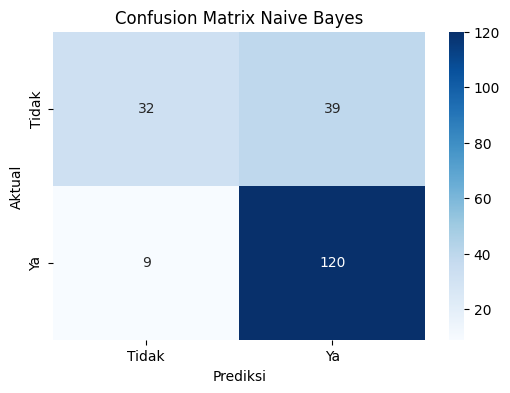

In [32]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak', 'Ya'], yticklabels=['Tidak', 'Ya'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Naive Bayes')
plt.show()


In [33]:
print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.76


In [34]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.45      0.57        71
           1       0.75      0.93      0.83       129

    accuracy                           0.76       200
   macro avg       0.77      0.69      0.70       200
weighted avg       0.76      0.76      0.74       200

